In [ ]:
# Using this notebook I will make all the necessary data store on drive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import os
import random
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage import transform
from skimage.color import rgb2gray

In [2]:
fruit_class_training_folder = "/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/"
fruit_class_testing_folder = "/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Test/"
all_fruit_classes = os.listdir(fruit_class_training_folder)

In [3]:
def process_name(name):
  name = name.lower()
  names = name.split()
  return ("_").join(names)

In [4]:
process_name("Apple Braeburn")

'apple_braeburn'

In [ ]:
# Function to find and store all hog features, takes almost 15 minutes to finish
image_and_hog = {}
def make_hogs():
  cnt = 1
  for class_ in all_fruit_classes:
    path = fruit_class_training_folder+"/"+class_
    for img in os.listdir(path):
      image = imread(path+"/"+img)
      image_and_hog[process_name(class_)+"_"+img] = hog(resize(image, (128,64)) , orientations=8, pixels_per_cell=(16, 16), 
                    cells_per_block=(1, 1), visualize=False, multichannel=True)
      if cnt%1000==0:
        print(cnt,"images processed..")
      cnt+=1

In [ ]:
make_hogs()

1000 images processed..
2000 images processed..
3000 images processed..
4000 images processed..
5000 images processed..
6000 images processed..
7000 images processed..
8000 images processed..
9000 images processed..
10000 images processed..
11000 images processed..
12000 images processed..
13000 images processed..
14000 images processed..
15000 images processed..
16000 images processed..
17000 images processed..
18000 images processed..
19000 images processed..
20000 images processed..
21000 images processed..
22000 images processed..
23000 images processed..
24000 images processed..
25000 images processed..
26000 images processed..
27000 images processed..
28000 images processed..
29000 images processed..
30000 images processed..
31000 images processed..
32000 images processed..
33000 images processed..
34000 images processed..
35000 images processed..
36000 images processed..
37000 images processed..
38000 images processed..
39000 images processed..
40000 images processed..
41000 ima

In [ ]:
# Dataframe for all 256 length hogs (of all images)
hog_256_all = pd.DataFrame.from_dict(image_and_hog,orient='columns')
hog_256_all.to_csv("/content/drive/MyDrive/Semester4/DS250/hog_256_all.csv")
# Finishes in 55 seconds

In [ ]:
all_class_names = []
for cl in all_fruit_classes:
  all_class_names.append(process_name(cl))

In [ ]:
# Making a dataframe for test images, to store their paths and labels
test_images = pd.DataFrame(columns = ['image','label'])
test_and_label = {}
for cl in os.listdir(fruit_class_testing_folder):
  for im in os.listdir(fruit_class_testing_folder+cl):
    test_images = test_images.append({'image':cl+"/"+im,'label':process_name(cl)},ignore_index=True)

In [ ]:
test_images

,image,label
0,Apple Braeburn/3_100.jpg,apple_braeburn
1,Apple Braeburn/32_100.jpg,apple_braeburn
2,Apple Braeburn/321_100.jpg,apple_braeburn
3,Apple Braeburn/322_100.jpg,apple_braeburn
4,Apple Braeburn/323_100.jpg,apple_braeburn
...,...,...
22683,Watermelon/r_95_100.jpg,watermelon
22684,Watermelon/r_96_100.jpg,watermelon
22685,Watermelon/r_97_100.jpg,watermelon
22686,Watermelon/r_98_100.jpg,watermelon


In [ ]:
test_images.to_csv("/content/drive/MyDrive/Semester4/DS250/test_images_paths.csv")

In [ ]:
# Function to find and store all hog features for test images, takes almost 15 minutes to finish
test_image_and_hog = {}
def test_make_hogs():
  cnt = 1
  for class_ in all_fruit_classes:
    path = fruit_class_testing_folder+"/"+class_
    for img in os.listdir(path):
      image = imread(path+"/"+img)
      test_image_and_hog[process_name(class_)+"_"+img] = hog(resize(image, (128,64)) , orientations=8, pixels_per_cell=(16, 16), 
                    cells_per_block=(1, 1), visualize=False, multichannel=True)
      if cnt%1000==0:
        print(cnt,"images processed..")
      cnt+=1

In [ ]:
test_make_hogs()

1000 images processed..
2000 images processed..
3000 images processed..
4000 images processed..
5000 images processed..
6000 images processed..
7000 images processed..
8000 images processed..
9000 images processed..
10000 images processed..
11000 images processed..
12000 images processed..
13000 images processed..
14000 images processed..
15000 images processed..
16000 images processed..
17000 images processed..
18000 images processed..
19000 images processed..
20000 images processed..
21000 images processed..
22000 images processed..


In [ ]:
hog_256_test = pd.DataFrame.from_dict(test_image_and_hog)

In [ ]:
hog_256_test

,kohlrabi_32_100.jpg,kohlrabi_15_100.jpg,kohlrabi_r_137_100.jpg,kohlrabi_r_302_100.jpg,kohlrabi_r_292_100.jpg,kohlrabi_r_141_100.jpg,kohlrabi_r_163_100.jpg,kohlrabi_r_139_100.jpg,kohlrabi_r_303_100.jpg,kohlrabi_r_277_100.jpg,kohlrabi_228_100.jpg,kohlrabi_41_100.jpg,kohlrabi_225_100.jpg,kohlrabi_r_268_100.jpg,kohlrabi_46_100.jpg,kohlrabi_232_100.jpg,kohlrabi_r_13_100.jpg,kohlrabi_216_100.jpg,kohlrabi_r_7_100.jpg,kohlrabi_r_286_100.jpg,kohlrabi_r_285_100.jpg,kohlrabi_r_288_100.jpg,kohlrabi_48_100.jpg,kohlrabi_53_100.jpg,kohlrabi_45_100.jpg,kohlrabi_r_0_100.jpg,kohlrabi_218_100.jpg,kohlrabi_r_296_100.jpg,kohlrabi_r_142_100.jpg,kohlrabi_220_100.jpg,kohlrabi_39_100.jpg,kohlrabi_r_298_100.jpg,kohlrabi_r_129_100.jpg,kohlrabi_r_291_100.jpg,kohlrabi_r_287_100.jpg,kohlrabi_25_100.jpg,kohlrabi_36_100.jpg,kohlrabi_r_6_100.jpg,kohlrabi_r_289_100.jpg,kohlrabi_r_143_100.jpg,...,kaki_7_100.jpg,kaki_257_100.jpg,kaki_r_78_100.jpg,kaki_294_100.jpg,kaki_161_100.jpg,kaki_r_173_100.jpg,kaki_r_159_100.jpg,kaki_r_185_100.jpg,kaki_8_100.jpg,kaki_267_100.jpg,kaki_279_100.jpg,kaki_r_151_100.jpg,kaki_275_100.jpg,kaki_r_175_100.jpg,kaki_r_176_100.jpg,kaki_r_190_100.jpg,kaki_283_100.jpg,kaki_r_191_100.jpg,kaki_r_137_100.jpg,kaki_r_155_100.jpg,kaki_11_100.jpg,kaki_266_100.jpg,kaki_288_100.jpg,kaki_r_172_100.jpg,kaki_155_100.jpg,kaki_252_100.jpg,kaki_185_100.jpg,kaki_r_146_100.jpg,kaki_r_144_100.jpg,kaki_263_100.jpg,kaki_r_76_100.jpg,kaki_286_100.jpg,kaki_268_100.jpg,kaki_269_100.jpg,kaki_r_152_100.jpg,kaki_r_85_100.jpg,kaki_r_193_100.jpg,kaki_r_166_100.jpg,kaki_0_100.jpg,kaki_r_182_100.jpg
0,0.0,0.000000,0.265984,0.486064,0.598229,0.471812,0.397428,0.494376,0.448017,0.430054,0.0,0.000000,0.0,0.471843,0.000000,0.0,0.519864,0.0,0.666162,0.584099,0.572046,0.590918,0.000000,0.000000,0.000000,0.647060,0.0,0.472749,0.497296,0.0,0.00000,0.382246,0.163523,0.576893,0.569448,0.000000,0.000000,0.573767,0.571603,0.521410,...,0.507611,0.589025,0.363208,0.604583,0.419250,0.000000,0.375605,0.000000,0.578471,0.640936,0.536614,0.366565,0.535113,0.000000,0.000000,0.000000,0.545497,0.000000,0.473493,0.376812,0.639931,0.640262,0.609856,0.000000,0.406200,0.531139,0.413126,0.357435,0.353553,0.666270,0.378942,0.561956,0.666916,0.674682,0.353553,0.392281,0.000000,0.000000,0.609020,0.000000
1,0.0,0.000000,0.523908,0.486064,0.598229,0.471812,0.379771,0.494376,0.448017,0.328755,0.0,0.000000,0.0,0.471843,0.000000,0.0,0.519864,0.0,0.666162,0.584099,0.572046,0.590918,0.000000,0.000000,0.000000,0.150333,0.0,0.472749,0.497296,0.0,0.00000,0.382246,0.693681,0.576893,0.569448,0.000000,0.000000,0.573767,0.571603,0.521410,...,0.507611,0.589025,0.277495,0.604583,0.347723,0.000000,0.375605,0.000000,0.578471,0.640936,0.536614,0.366565,0.535113,0.000000,0.000000,0.000000,0.545497,0.000000,0.502240,0.212538,0.639931,0.640262,0.609856,0.000000,0.406200,0.531139,0.400141,0.357435,0.353553,0.666270,0.259968,0.561956,0.666916,0.674682,0.353553,0.392281,0.000000,0.000000,0.609020,0.000000
2,0.0,0.000000,0.523908,0.343314,0.114014,0.471812,0.397428,0.494376,0.186007,0.282961,0.0,0.000000,0.0,0.471843,0.000000,0.0,0.519864,0.0,0.268089,0.235075,0.228892,0.312916,0.000000,0.000000,0.000000,0.055869,0.0,0.166642,0.497296,0.0,0.00000,0.382246,0.693681,0.232190,0.228445,0.000000,0.000000,0.100351,0.133093,0.521410,...,0.087665,0.084224,0.363208,0.274520,0.387632,0.000000,0.375605,0.000000,0.122720,0.089940,0.062382,0.366565,0.115229,0.000000,0.000000,0.000000,0.107482,0.000000,0.502240,0.376812,0.115792,0.059723,0.100070,0.000000,0.361407,0.103191,0.391626,0.357435,0.353553,0.076647,0.378942,0.121855,0.138859,0.123194,0.353553,0.392281,0.000000,0.000000,0.234545,0.000000
3,0.0,0.000000,0.523908,0.111237,0.000000,0.471812,0.397428,0.494376,0.236495,0.124677,0.0,0.000000,0.0,0.096996,0.000000,0.0,0.055376,0.0,0.034288,0.051308,0.049958,0.081299,0.000000,0.000000,0.000000,0.192466,0.0,0.118122,0.497296,0.0,0.00000,0.260717,0.051751,0.050678,0.049861,0.000000,0.000000,0.028095,0.104487,0.210727,...,0.210078,0.087

In [ ]:
hog_256_test.to_csv("/content/drive/MyDrive/Semester4/DS250/hog_256_test.csv")
# finishes in 12 seconds

In [ ]:
training_hogs = pd.read_csv("/content/drive/MyDrive/Semester4/DS250/hog_256_all.csv")
testing_hogs = pd.read_csv("/content/drive/MyDrive/Semester4/DS250/hog_256_test.csv")

In [ ]:
training_image_and_label = {}
for im in training_hogs.columns:
  for cl in all_fruit_classes:
    if process_name(cl) in im:
      training_image_and_label[im] = process_name(cl)

In [ ]:
testing_image_and_label = {}
for im in testing_hogs.columns:
  for cl in all_fruit_classes:
    if process_name(cl) in im:
      testing_image_and_label[im] = process_name(cl)

In [ ]:
len(training_image_and_label), len(testing_image_and_label)

(67692, 22688)

In [ ]:
testing_img_label_df = pd.DataFrame(columns=['image','label'])
testing_img_label_df['image'] = testing_image_and_label.keys()
testing_img_label_df['label'] = testing_image_and_label.values()

In [ ]:
training_img_label_df = pd.DataFrame(columns=['image','label'])
training_img_label_df['image'] = training_image_and_label.keys()
training_img_label_df['label'] = training_image_and_label.values()

In [ ]:

testing_img_label_df

,image,label
0,kohlrabi_32_100.jpg,kohlrabi
1,kohlrabi_15_100.jpg,kohlrabi
2,kohlrabi_r_137_100.jpg,kohlrabi
3,kohlrabi_r_302_100.jpg,kohlrabi
4,kohlrabi_r_292_100.jpg,kohlrabi
...,...,...
22683,kaki_r_85_100.jpg,kaki
22684,kaki_r_193_100.jpg,kaki
22685,kaki_r_166_100.jpg,kaki
22686,kaki_0_100.jpg,kaki


In [ ]:
training_img_label_df

,image,label
0,kohlrabi_r_86_100.jpg,kohlrabi
1,kohlrabi_r_185_100.jpg,kohlrabi
2,kohlrabi_182_100.jpg,kohlrabi
3,kohlrabi_r_226_100.jpg,kohlrabi
4,kohlrabi_r_53_100.jpg,kohlrabi
...,...,...
67687,kaki_117_100.jpg,kaki
67688,kaki_181_100.jpg,kaki
67689,kaki_r_305_100.jpg,kaki
67690,kaki_41_100.jpg,kaki


In [ ]:
testing_img_label_df.to_csv("/content/drive/MyDrive/Semester4/DS250/testing_image_label.csv")
training_img_label_df.to_csv("/content/drive/MyDrive/Semester4/DS250/training_image_label.csv")

In [ ]:
testing_img_label_df.value_counts()

image                       label         
watermelon_r_99_100.jpg     watermelon        1
grape_blue_r_207_100.jpg    grape_blue        1
grape_blue_r_261_100.jpg    grape_blue        1
grape_blue_r_262_100.jpg    grape_blue        1
grape_blue_r_264_100.jpg    grape_blue        1
                                             ..
pear_red_259_100.jpg        pear              1
pear_red_260_100.jpg        pear              1
pear_red_261_100.jpg        pear              1
pear_red_263_100.jpg        pear              1
apple_braeburn_321_100.jpg  apple_braeburn    1
Length: 22688, dtype: int64

In [ ]:
testing_img_label_df.iloc[0]['label']

'kohlrabi'

In [ ]:
hog_256_all =pd.read_csv("/content/drive/MyDrive/Semester4/DS250/hog_256_all.csv")

In [ ]:
hog_256_all.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
hog_256_all

,kohlrabi_r_86_100.jpg,kohlrabi_r_185_100.jpg,kohlrabi_182_100.jpg,kohlrabi_r_226_100.jpg,kohlrabi_r_53_100.jpg,kohlrabi_272_100.jpg,kohlrabi_r_236_100.jpg,kohlrabi_115_100.jpg,kohlrabi_145_100.jpg,kohlrabi_204_100.jpg,kohlrabi_r_110_100.jpg,kohlrabi_60_100.jpg,kohlrabi_r_161_100.jpg,kohlrabi_r_106_100.jpg,kohlrabi_r_108_100.jpg,kohlrabi_108_100.jpg,kohlrabi_r_208_100.jpg,kohlrabi_r_75_100.jpg,kohlrabi_87_100.jpg,kohlrabi_143_100.jpg,kohlrabi_318_100.jpg,kohlrabi_286_100.jpg,kohlrabi_138_100.jpg,kohlrabi_117_100.jpg,kohlrabi_r_202_100.jpg,kohlrabi_152_100.jpg,kohlrabi_r_172_100.jpg,kohlrabi_r_265_100.jpg,kohlrabi_r_196_100.jpg,kohlrabi_104_100.jpg,kohlrabi_r_109_100.jpg,kohlrabi_312_100.jpg,kohlrabi_102_100.jpg,kohlrabi_210_100.jpg,kohlrabi_r_248_100.jpg,kohlrabi_184_100.jpg,kohlrabi_178_100.jpg,kohlrabi_r_107_100.jpg,kohlrabi_162_100.jpg,kohlrabi_246_100.jpg,...,kaki_r_297_100.jpg,kaki_r_90_100.jpg,kaki_58_100.jpg,kaki_231_100.jpg,kaki_78_100.jpg,kaki_r_274_100.jpg,kaki_107_100.jpg,kaki_r_95_100.jpg,kaki_326_100.jpg,kaki_r_304_100.jpg,kaki_r_29_100.jpg,kaki_r_51_100.jpg,kaki_r_271_100.jpg,kaki_230_100.jpg,kaki_r_250_100.jpg,kaki_43_100.jpg,kaki_50_100.jpg,kaki_36_100.jpg,kaki_46_100.jpg,kaki_r_247_100.jpg,kaki_320_100.jpg,kaki_r_117_100.jpg,kaki_r_223_100.jpg,kaki_r_105_100.jpg,kaki_r_268_100.jpg,kaki_r_275_100.jpg,kaki_r_48_100.jpg,kaki_r_131_100.jpg,kaki_129_100.jpg,kaki_r_222_100.jpg,kaki_26_100.jpg,kaki_r_120_100.jpg,kaki_r_122_100.jpg,kaki_51_100.jpg,kaki_r_307_100.jpg,kaki_117_100.jpg,kaki_181_100.jpg,kaki_r_305_100.jpg,kaki_41_100.jpg,kaki_r_322_100.jpg
0,0.244986,0.700108,0.602885,0.433731,0.183915,0.500349,0.606910,0.440960,0.000000,0.371565,0.246831,0.531798,0.407006,0.559620,0.360023,0.259075,0.418187,0.663143,0.541845,0.519032,0.656144,0.381794,0.767622,0.390490,0.440682,0.000000,0.433983,0.487182,0.679874,0.443294,0.360843,0.000000,0.383609,0.405273,0.440705,0.484196,0.537716,0.319228,0.000000,0.000000,...,0.401759,0.350669,0.702289,0.526285,0.636930,0.283476,0.525562,0.323637,0.698151,0.370258,0.369383,0.384655,0.359801,0.452397,0.474683,0.701676,0.615898,0.698288,0.697741,0.410452,0.656626,0.326238,0.449571,0.294490,0.288267,0.277028,0.340675,0.346385,0.468412,0.535071,0.685348,0.301491,0.268576,0.642936,0.376583,0.606075,0.387625,0.359225,0.635145,0.404438
1,0.639183,0.700108,0.325233,0.433731,0.628718,0.500349,0.070929,0.176843,0.000000,0.371565,0.648852,0.531798,0.407006,0.559620,0.667102,0.171609,0.212583,0.700815,0.541845,0.519032,0.345194,0.202595,0.166541,0.155513,0.440682,0.000000,0.433983,0.191476,0.679874,0.082221,0.631877,0.000000,0.403960,0.405273,0.440705,0.271496,0.537716,0.619024,0.000000,0.000000,...,0.401759,0.595244,0.702289,0.526285,0.636930,0.848923,0.525562,0.624414,0.698151,0.370258,0.369383,0.346737,0.779310,0.452397,0.474683,0.701676,0.764667,0.698288,0.697741,0.410452,0.724181,0.660779,0.449571,0.657928,0.815271,0.704951,0.305719,0.652505,0.352696,0.127236,0.685348,0.931161,0.913592,0.752013,0.221598,0.606075,0.342515,0.359225,0.760004,0.256004
2,0.615903,0.081811,0.096266,0.179215,0.628718,0.395144,0.134966,0.188021,0.000000,0.183240,0.648852,0.389322,0.407006,0.559620,0.610225,0.426653,0.234962,0.126166,0.460331,0.000000,0.210187,0.381794,0.161296,0.409296,0.146020,0.000000,0.433983,0.203820,0.134646,0.443294,0.623697,0.000000,0.412655,0.405273,0.440705,0.300083,0.192307,0.619024,0.000000,0.000000,...,0.128056,0.595244,0.042147,0.443968,0.070766,0.362743,0.278289,0.624414,0.050700,0.370258,0.369383,0.384655,0.368972,0.215664,0.474683,0.047654,0.044017,0.042704,0.048272,0.410452,0.027467,0.660779,0.327611,0.657928,0.456200,0.623979,0.518388,0.652505,0.239590,0.321370,0.046563,0.171626,0.265258,0.048778,0.376583,0.247930,0.321963,0.359225,0.053445,0.404438
3,0.150850,0.046621,0.132496,0.265046,0.410502,0.048188,0.236571,0.501476,0.000000,0.371565,0.263030,0.000000,0.407006,0.143609,0.122156,0.426653,0.295254,0.094713,0.069633,0.000000,0.122317,0.381794,0.119364,0.492288,0.188724,0.00000

In [ ]:
all_cols = hog_256_all.columns

In [ ]:
hog_256_averages = {}
for class_ in all_fruit_classes:
    images = os.listdir(fruit_class_training_folder+class_)
    sum = [0 for i in range(256)]
    for im in images:
        sum+=hog_256_all[process_name(class_)+"_"+im].values
    avg = sum/len(images)
    hog_256_averages[process_name(class_)] = avg

In [ ]:
len(hog_256_averages)

131

In [ ]:
hog_256_avg = pd.DataFrame.from_dict(hog_256_averages)

In [ ]:
hog_256_avg

,kohlrabi,kumquats,kiwi,lemon_meyer,lychee,lemon,limes,mango_red,mangostan,mandarine,mango,melon_piel_de_sapo,mulberry,nectarine_flat,maracuja,nut_pecan,nectarine,nut_forest,onion_red_peeled,onion_red,onion_white,passion_fruit,papaya,orange,peach_2,peach,peach_flat,pear_forelle,pear_abate,pear_2,pear_kaiser,pear_monster,pear_red,pear_stone,pear_williams,pepino,pear,pepper_green,pepper_red,pepper_orange,...,banana_lady_finger,banana_red,banana,beetroot,blueberry,cactus_fruit,cantaloupe_1,cantaloupe_2,carambula,cauliflower,cherry_1,cherry_2,cherry_rainier,cherry_wax_black,cherry_wax_red,cherry_wax_yellow,chestnut,clementine,cocos,corn_husk,corn,cucumber_ripe_2,cucumber_ripe,dates,eggplant,fig,ginger_root,granadilla,grape_blue,grape_pink,grape_white_2,grape_white_3,grape_white_4,grape_white,grapefruit_pink,grapefruit_white,guava,hazelnut,huckleberry,kaki
0,0.409674,0.493125,0.523071,0.412171,0.460870,0.417252,0.502872,0.431375,0.331863,0.449780,0.495971,0.458438,0.302511,0.421342,0.536978,0.139704,0.491481,0.470568,0.265330,0.336223,0.487411,0.525188,0.368727,0.480939,0.525922,0.494041,0.274524,0.334197,0.252292,0.100184,0.209808,0.344504,0.223575,0.296745,0.370041,0.429285,0.375208,0.430264,0.442424,0.457840,...,0.129955,0.076652,0.061549,0.075279,0.359519,0.193887,0.440446,0.517032,0.351162,0.468314,0.588780,0.471486,0.467051,0.202253,0.288496,0.470623,0.363878,0.460003,0.538872,0.0,0.001747,0.344221,0.298267,0.166699,0.108445,0.248320,0.118170,0.178538,0.368366,0.526139,0.391502,0.494082,0.469238,0.483506,0.407850,0.518497,0.446965,0.264359,0.462780,0.462635
1,0.415277,0.514705,0.535316,0.494316,0.433149,0.490887,0.676448,0.375412,0.418006,0.532739,0.581546,0.470871,0.213131,0.452523,0.619285,0.134803,0.663658,0.550440,0.328282,0.368304,0.536144,0.644053,0.343022,0.636297,0.579617,0.605717,0.277906,0.347374,0.106755,0.073376,0.214939,0.334555,0.260334,0.277095,0.365890,0.377857,0.351386,0.489466,0.558331,0.534707,...,0.060995,0.061756,0.041444,0.077171,0.386604,0.192686,0.515924,0.562976,0.322636,0.455887,0.615690,0.552441,0.603901,0.723183,0.755320,0.548068,0.370693,0.696825,0.491225,0.0,0.001208,0.277465,0.241834,0.125475,0.078089,0.310479,0.108044,0.215210,0.754037,0.560364,0.849959,0.555940,0.654550,0.589137,0.717494,0.619451,0.524579,0.190971,0.529673,0.502669
2,0.337332,0.202020,0.217304,0.337212,0.376502,0.407505,0.385384,0.237875,0.235294,0.322519,0.328257,0.341902,0.147931,0.191444,0.308114,0.106805,0.441368,0.400797,0.156257,0.212321,0.308961,0.318070,0.151781,0.543305,0.398643,0.496778,0.199813,0.258617,0.099948,0.057730,0.112246,0.229782,0.227027,0.208053,0.235033,0.249297,0.280401,0.404449,0.394057,0.357060,...,0.030168,0.039789,0.016719,0.051617,0.082457,0.137770,0.375056,0.329688,0.216619,0.326254,0.371284,0.407927,0.346949,0.593630,0.526220,0.487099,0.171123,0.319365,0.242401,0.0,0.001616,0.203989,0.172783,0.133306,0.053574,0.193006,0.075535,0.115445,0.381292,0.353711,0.190882,0.514528,0.427156,0.328921,0.358377,0.509587,0.367199,0.124733,0.339514,0.273988
3,0.191764,0.138234,0.092098,0.247055,0.275570,0.232189,0.103904,0.185292,0.152357,0.226340,0.144666,0.192605,0.091264,0.116864,0.149868,0.044421,0.103667,0.148040,0.065067,0.089796,0.214714,0.103849,0.085916,0.087825,0.167118,0.187919,0.064354,0.176754,0.137355,0.052230,0.038497,0.161234,0.137009,0.137871,0.117020,0.171436,0.151898,0.256252,0.238925,0.211007,...,0.028104,0.042415,0.021476,0.027665,0.037546,0.062452,0.237429,0.174783,0.175280,0.224753,0.102692,0.205704,0.184268,0.086343,0.065652,0.204605,0.090281,0.128048,0.163131,0.0,0.001334,0.132080,0.117885,0.080148,0.031780,0.094132,0.052569,0.067886,0.093281,0.179035,0.053145,0.269477,0.184414,0.147270,0.132538,0.091989,0.198255,0.084922,0.207655,0.212532
4,0.219304,0.132705,0.091388,0.247852,0.202179,0.223956,0.080638,0.218265,0.141886,0.221024,0.142925,0.210571,0.159684,0.125086,0.107652,0.084134,0.078318,0.162551,0.084507,0.113380,0.201177,0.096237,0.092034,0.087906,0.117132,0.080347,0.047365,0.16918

In [ ]:
hog_256_avg.to_csv("/content/drive/MyDrive/Semester4/DS250/hog_256_averages.csv")

In [ ]:
# Using sift
import cv2
import scipy
from matplotlib.pyplot import imread
import pickle

In [ ]:
# Feature extractor
def extract_features(image_path, vector_size=32):
    image = imread(image_path, format="RGB")
    try:
        # Using KAZE, cause SIFT, ORB and other was moved to additional module
        # which is adding addtional pain during install
        alg = cv2.xfeatures2d.SIFT_create()
        # Dinding image keypoints
        kps = alg.detect(image)
        # Getting first 32 of them. 
        # Number of keypoints is varies depend on image size and color pallet
        # Sorting them based on keypoint response value(bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        # computing descriptors vector
        kps, dsc = alg.compute(image, kps)
        # Flatten all of them in one big vector - our feature vector
        dsc = dsc.flatten()
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if dsc.size < needed_size:
            # if we have less the 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print('Error: ', e)
        return None

    return dsc

In [ ]:
images_path = fruit_class_training_folder+"Apple Braeburn/"
def batch_extractor(images_path, pickled_db_path="features.pkl"):
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]

    result = {}
    for f in files:
        print('Extracting features from image %s' % f)
        name = f.split('/')[-1].lower()
        result[name] = extract_features(f)
    
    # saving all our feature vectors in pickled file
    with open("/content/drive/MyDrive/Semester4/DS250/"+pickled_db_path, 'wb') as fp:
        pickle.dump(result, fp)
    #return result

In [ ]:
class Matcher(object):

    def __init__(self, pickled_db_path="features.pkl"):
        with open("/content/drive/MyDrive/Semester4/DS250/"+pickled_db_path) as fp:
            self.data = pickle.load(fp)
        self.names = []
        self.matrix = []
        for k, v in self.data.iteritems():
            self.names.append(k)
            self.matrix.append(v)
        self.matrix = np.array(self.matrix)
        self.names = np.array(self.names)

    def cos_cdist(self, vector):
        # getting cosine distance between search image and images database
        v = vector.reshape(1, -1)
        return scipy.spatial.distance.cdist(self.matrix, v, 'cosine').reshape(-1)

    def match(self, image_path, topn=5):
        features = extract_features(image_path)
        img_distances = self.cos_cdist(features)
        # getting top 5 records
        nearest_ids = np.argsort(img_distances)[:topn].tolist()
        nearest_img_paths = self.names[nearest_ids].tolist()

        return nearest_img_paths, img_distances[nearest_ids].tolist()

In [ ]:
def show_img(path):
    img = imread(path, format="RGB")
    plt.imshow(img)
    plt.show()
    
def run():
    images_path = fruit_class_testing_folder+"Apple Braeburn/"
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]
    # getting 3 random images 
    sample = random.sample(files, 3)
    
    batch_extractor(images_path)

    ma = Matcher('features.kl')
    
    for s in sample:
        print('Query image ==========================================')
        show_img(s)
        names, match = ma.match(s, topn=3)
        print('Result images ========================================')
        for i in range(3):
            # we got cosine distance, less cosine distance between vectors
            # more they similar, thus we subtruct it from 1 to get match value
            print('Match %s' % (1-match[i]))
            show_img(os.path.join(images_path, names[i]))

run()

Extracting features from image /content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Test/Apple Braeburn/321_100.jpg
Error:  OpenCV(4.1.2) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'

Extracting features from image /content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Test/Apple Braeburn/322_100.jpg
Error:  OpenCV(4.1.2) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'

Extracting features from image /content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Test/Apple Braeburn/323_100.jpg
Error:  OpenCV(4.1.2) /io/opencv_contrib/modules/

FileNotFoundError: ignored

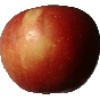

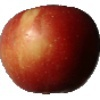

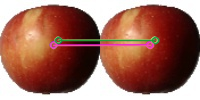

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img1 = cv2.imread(fruit_class_training_folder+"Apple Braeburn/0_100.jpg")
img2 = cv2.imread(fruit_class_testing_folder+"Apple Braeburn/3_100.jpg")
orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(match_img)
cv2.waitKey()

In [ ]:
matches[0].distance

14.0

In [ ]:
des1, des2

(array([[222, 255, 255, 247, 172, 111,  95, 255, 191, 254, 191, 191, 223,
         255, 219,  59, 255, 247, 255, 175, 249, 103, 251, 250, 251, 255,
         239, 188, 166, 243, 167, 115],
        [221, 244, 253, 247, 189, 126,  95, 184, 255, 255, 183,  60, 255,
         255,  79,  59, 183, 215, 253, 114, 255, 101, 251, 251, 255, 251,
         103, 183, 226, 247, 199, 115],
        [220, 253, 253, 247, 189, 127, 127, 191, 191, 255, 191,  56, 255,
         255, 219,  51, 255, 247, 255,  46, 249, 231, 251, 238, 255, 255,
         239, 181, 134, 247, 199, 115],
        [252, 244, 253, 247, 173, 126,  95, 188, 191, 254, 183,  24, 223,
         127,  79, 123, 183, 215, 253, 114, 251, 101, 251, 187, 255, 255,
         103, 247, 226, 243, 199, 115],
        [220, 253, 253, 247, 189, 127,  95, 188, 191, 254, 191,  28, 223,
         255,  95, 123, 191, 215, 253, 114, 249, 103, 251, 186, 255, 255,
         103,  53, 234, 243, 198, 115]], dtype=uint8),
 array([[206, 255, 253, 247, 188, 127, 127, 2

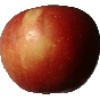

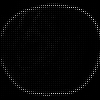

In [ ]:
from skimage.feature import hog
import cv2

ori = cv2.imread(fruit_class_training_folder+"Apple Braeburn/0_100.jpg")
img = cv2.imread(fruit_class_testing_folder+"Apple Braeburn/3_100.jpg") 
_, hog_image = hog(img, orientations=8, pixels_per_cell=(2, 2),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
cv2_imshow(ori)
cv2_imshow(hog_image)

2500


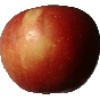

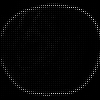

5000


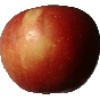

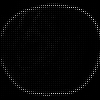

7500


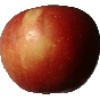

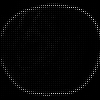

10000


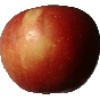

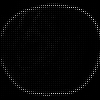

12500


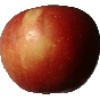

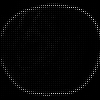

15000


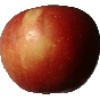

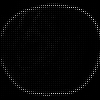

17500


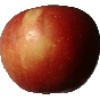

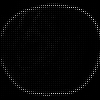

20000


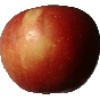

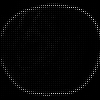

22500


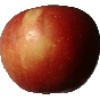

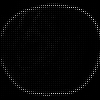

In [ ]:
for i in range(1,10):
  
  ori = cv2.imread(fruit_class_training_folder+"Apple Braeburn/0_100.jpg")
  img = cv2.imread(fruit_class_testing_folder+"Apple Braeburn/3_100.jpg") 
  _, hog_image = hog(img, orientations=i, pixels_per_cell=(2, 2),
                      cells_per_block=(1, 1), visualize=True, multichannel=True)
  print(len(_))
  cv2_imshow(ori)
  cv2_imshow(hog_image)
  print("=====================================================")

In [ ]:
print(_)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# Let us try hog 2500
avg_hogs_2500 = pd.DataFrame(columns=['class','hogs2500'])
avghogs2500 = []
classes = []
#training_images = pd.read_csv("/content/drive/MyDrive/Semester4/DS250/")
for i,cl in enumerate(os.listdir(fruit_class_training_folder)):
  print(path)
  path = fruit_class_training_folder+cl
  sum = np.array([0 for i in range(2500)]).astype(float)
  cnt = 0
  for img in os.listdir(path):
    cnt+=1
    #print(path+"/"+img)
    ori = cv2.imread(path+"/"+img,1)
    #print(ori.shape)
    feature= hog(ori, orientations=1, pixels_per_cell=(2, 2),cells_per_block=(1, 1), visualize=False, multichannel=True)
    sum+=feature
  avg = sum/cnt
  avghogs2500.append(avg)
  classes.append(cl)
  if i%1000==0:
    print(i,"images processed")

/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Kohlrabi
0 images processed
/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Kohlrabi
/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Kumquats
/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Kiwi
/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Lemon Meyer
/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Lychee
/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Lemon
/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Limes
/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Mango Red
/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Mangostan
/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Mandarine
/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Mango
/conte

In [ ]:
avg_hogs_2500['class'] = classes
avg_hogs_2500['hogs2500'] = avghogs2500